<a href="https://www.kaggle.com/code/mikedelong/python-plot-us-total-overdose-deaths?scriptVersionId=141259637" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
df = pd.read_csv('/kaggle/input/drug-overdose-deaths/VSRR_Provisional_Drug_Overdose_Death_Counts.csv', thousands=',')
# the most important values are in two columns; if they're not there let's drop them.
df = df.dropna(subset=['Data Value', 'Predicted Value'])
df.head()


,State,Year,Month,Period,Indicator,Data Value,Percent Complete,Percent Pending Investigation,State Name,Footnote,Footnote Symbol,Predicted Value
11,AK,2015,April,12 month-ending,Number of Drug Overdose Deaths,126.0,100.0,0.0,Alaska,Numbers may differ from published reports usin...,**,126.0
19,AK,2015,August,12 month-ending,Number of Drug Overdose Deaths,124.0,100.0,0.0,Alaska,Numbers may differ from published reports usin...,**,124.0
25,AK,2015,December,12 month-ending,Number of Drug Overdose Deaths,121.0,100.0,0.0,Alaska,Numbers may differ from published reports usin...,**,121.0
41,AK,2015,February,12 month-ending,Number of Drug Overdose Deaths,127.0,100.0,0.0,Alaska,Numbers may differ from published reports usin...,**,127.0
54,AK,2015,January,12 month-ending,Number of Drug Overdose Deaths,126.0,100.0,0.0,Alaska,Numbers may differ from published reports usin...,**,126.0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37949 entries, 11 to 59399
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   State                          37949 non-null  object 
 1   Year                           37949 non-null  int64  
 2   Month                          37949 non-null  object 
 3   Period                         37949 non-null  object 
 4   Indicator                      37949 non-null  object 
 5   Data Value                     37949 non-null  float64
 6   Percent Complete               37949 non-null  float64
 7   Percent Pending Investigation  37949 non-null  float64
 8   State Name                     37949 non-null  object 
 9   Footnote                       33656 non-null  object 
 10  Footnote Symbol                33656 non-null  object 
 11  Predicted Value                37949 non-null  float64
dtypes: float64(4), int64(1), object(7)
memory usa

In [3]:
df.nunique()

State                              53
Year                                9
Month                              12
Period                              1
Indicator                          10
Data Value                       4748
Percent Complete                    2
Percent Pending Investigation    4583
State Name                         53
Footnote                            2
Footnote Symbol                     2
Predicted Value                  4768
dtype: int64

53 states seems odd; let's investigate. We clearly have one or two extra "states" and we need to know what their abbreviations are. Let's put them in alphabetical order in the hope the unexpected values will jump out.

<Axes: >

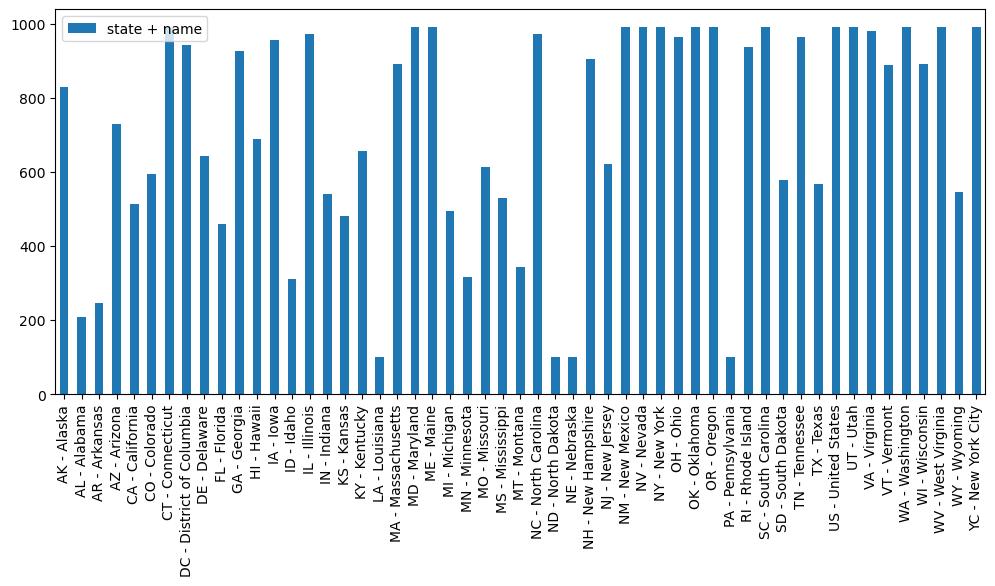

In [4]:
df['state + name'] = df['State'] + ' - ' + df['State Name']
df['state + name'].value_counts().sort_index().plot(figsize=(12, 5), kind='bar', legend=True, )

We have 50 states plus DC, the whole US, and NYC, which at the moment is not a state.

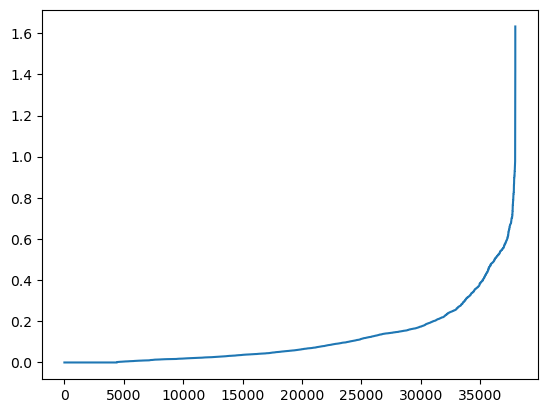

In [5]:
from matplotlib.pyplot import plot
plot(sorted(df['Percent Pending Investigation'].values))

Almost all the time our data is 99% complete or better.

In [6]:
df['Indicator'].value_counts()

Number of Drug Overdose Deaths                                                 5247
Opioids (T40.0-T40.4,T40.6)                                                    3755
Natural, semi-synthetic, & synthetic opioids, incl. methadone (T40.2-T40.4)    3755
Natural & semi-synthetic opioids, incl. methadone (T40.2, T40.3)               3746
Natural & semi-synthetic opioids (T40.2)                                       3741
Synthetic opioids, excl. methadone (T40.4)                                     3733
Psychostimulants with abuse potential (T43.6)                                  3604
Cocaine (T40.5)                                                                3515
Heroin (T40.1)                                                                 3506
Methadone (T40.3)                                                              3347
Name: Indicator, dtype: int64

In [7]:
us_df = df[(df['State'] == 'US') &  (df['Indicator'].str.startswith('Number')) ].copy()

In [8]:
us_df[us_df['Month'] == 'December']

,State,Year,Month,Period,Indicator,Data Value,Percent Complete,Percent Pending Investigation,State Name,Footnote,Footnote Symbol,Predicted Value,state + name
48733,US,2015,December,12 month-ending,Number of Drug Overdose Deaths,52623.0,100.0,0.153227,United States,Numbers may differ from published reports usin...,**,53356.0,US - United States
48877,US,2016,December,12 month-ending,Number of Drug Overdose Deaths,63938.0,100.0,0.166299,United States,Numbers may differ from published reports usin...,**,64932.0,US - United States
49030,US,2017,December,12 month-ending,Number of Drug Overdose Deaths,70699.0,100.0,0.142977,United States,Numbers may differ from published reports usin...,**,71595.0,US - United States
49168,US,2018,December,12 month-ending,Number of Drug Overdose Deaths,67850.0,100.0,0.141657,United States,Numbers may differ from published reports usin...,**,68699.0,US - United States
49312,US,2019,December,12 month-ending,Number of Drug Overdose Deaths,71130.0,100.0,0.156700,United States,Numbers may differ from published reports usin...,**,72151.0,US - United States
49452,US,2020,December,12 month-ending,Number of Drug Overdose Deaths,92478.0,100.0,0.143469,United States,Numbers may differ from published reports usin...,**,93655.0,US - United States
49599,US,2021,December,12 month-ending,Number of Drug Overdose Deaths,107573.0,100.0,0.161371,United States,Numbers may differ from published reports usin...,**,109179.0,US - United States
49747,US,2022,December,12 month-ending,Number of Drug Overdose Deaths,109170.0,100.0,0.173413,United States,NaN,NaN,110684.0,US - United States


<Axes: xlabel='Year', ylabel='Data Value'>

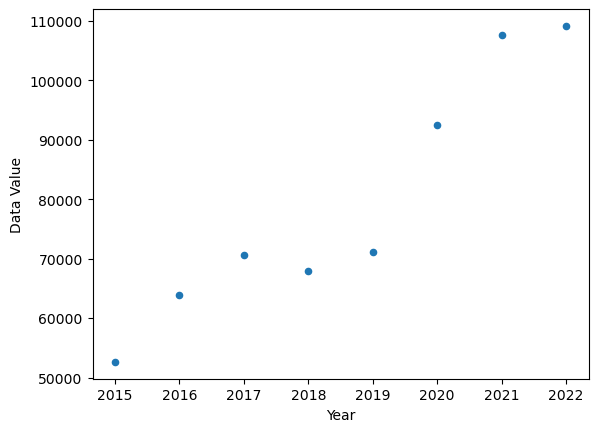

In [9]:
us_df[us_df['Month'] == 'December'][['Year', 'Data Value']].plot(kind='scatter', x='Year', y='Data Value')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


<Axes: xlabel='Data Value', ylabel='Predicted Value'>

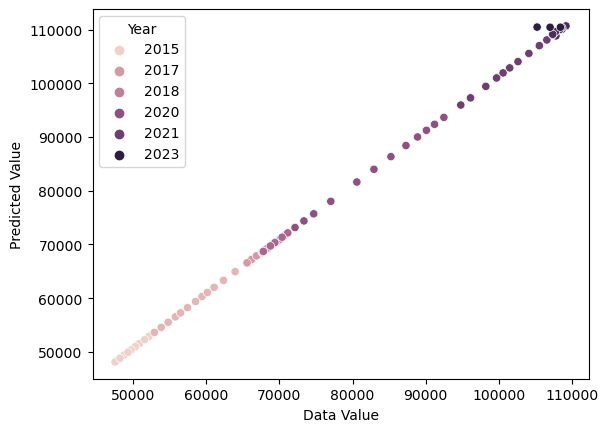

In [10]:
from seaborn import scatterplot
scatterplot(data=us_df, x='Data Value', y='Predicted Value', hue='Year')